In [186]:
import torch
import numpy
import matplotlib.pyplot as plt
import pandas
from torch import nn

In [187]:
 torch.__version__

'2.3.1+cu121'

In [188]:
## known variables

weight = 0.7
bias = 0.3

## creating a linear model
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [189]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

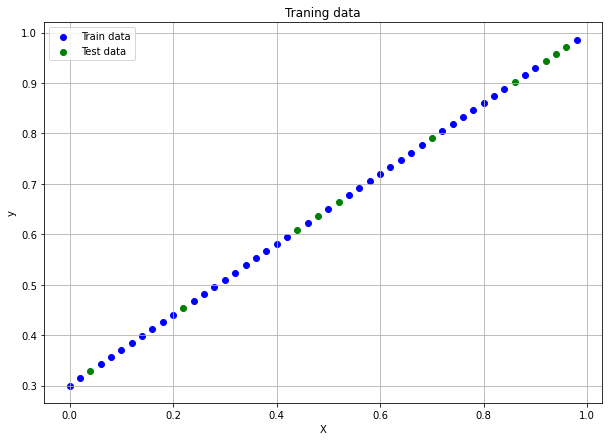

In [191]:
def plot_prediction(train_data = X_train, train_label = y_train, test_data = X_test, test_label = y_test, prediction = None):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_label, c="b", label = "Train data")
    plt.scatter(test_data, test_label, c="g", label = "Test data")

    if prediction != None:
        plt.scatter(test_data, prediction, c="purple", label = "Test data")
        
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid()
    plt.title("Traning data")
    plt.legend()

plot_prediction(X_train, y_train, X_test, y_test)

In [192]:
# linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype= torch.float, requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

In [193]:
model_0 = LinearRegressionModel()

In [194]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.4623], requires_grad=True),
 Parameter containing:
 tensor([-1.8204], requires_grad=True)]

In [195]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.4623])), ('bias', tensor([-1.8204]))])

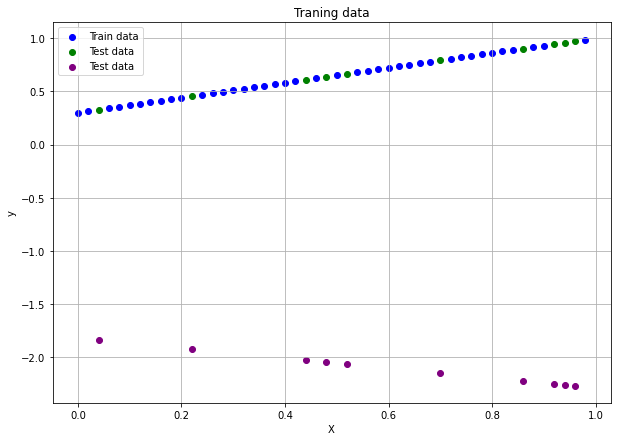

In [196]:
with torch.inference_mode():
    y_preds = model_0.forward(X_test)

    
y_preds

plot_prediction(prediction= y_preds)
# 

In [197]:
# loss function
loss_fn = nn.L1Loss()

# optimiser
optimizer = torch.optim.SGD(params=model_0.parameters(),lr= 0.01)

In [198]:
 ephocs = 500

for ephoc in range(ephocs):
    model_0.train() # pytorch will start tracking parameters and optimize for gradient decent

    # forward pass
    y_preds =  model_0.forward(X_train)

    # calculate the loss
    loss = loss_fn(y_preds, y_train)

    # reset the optimizer to zero
    optimizer.zero_grad()

    # loss backward 
    loss.backward()

    # steps the optimizer (perform the gradient decent)
    optimizer.step()

    # update the parameters
    model_0.eval()

    # stop parameter tracking
    with torch.inference_mode():
        # calcualte the loss on test set
        y_preds_ = model_0(X_test)

        # calculate lass
        loss_test = loss_fn(y_test, y_preds_)
    if ephoc % 10 == 0:
        print(f"Epochs = {ephoc} | Loss = {loss_test} | Params = {model_0.state_dict()}")

Epochs = 0 | Loss = 2.8143348693847656 | Params = OrderedDict([('weights', tensor([-0.4577])), ('bias', tensor([-1.8104]))])
Epochs = 10 | Loss = 2.6863362789154053 | Params = OrderedDict([('weights', tensor([-0.4117])), ('bias', tensor([-1.7104]))])
Epochs = 20 | Loss = 2.558338165283203 | Params = OrderedDict([('weights', tensor([-0.3656])), ('bias', tensor([-1.6104]))])
Epochs = 30 | Loss = 2.430339813232422 | Params = OrderedDict([('weights', tensor([-0.3196])), ('bias', tensor([-1.5104]))])
Epochs = 40 | Loss = 2.3023416996002197 | Params = OrderedDict([('weights', tensor([-0.2735])), ('bias', tensor([-1.4104]))])
Epochs = 50 | Loss = 2.1743433475494385 | Params = OrderedDict([('weights', tensor([-0.2275])), ('bias', tensor([-1.3104]))])
Epochs = 60 | Loss = 2.0463449954986572 | Params = OrderedDict([('weights', tensor([-0.1814])), ('bias', tensor([-1.2104]))])
Epochs = 70 | Loss = 1.9183467626571655 | Params = OrderedDict([('weights', tensor([-0.1354])), ('bias', tensor([-1.1104]

In [199]:
with torch.inference_mode():
    y_preds_ = model_0(X_test)
    
    loss = loss_fn(y_test, y_preds_)

In [200]:
y_preds_

tensor([[0.6195],
        [0.8026],
        [0.3377],
        [0.6758],
        [0.9857],
        [0.9716],
        [0.9153],
        [0.4645],
        [0.6476],
        [0.9576]])

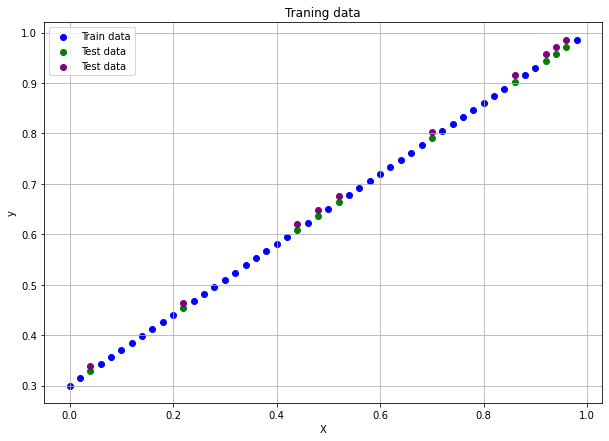

In [201]:
plot_prediction(prediction= y_preds_)

In [202]:
loss = loss_fn(y_preds_, y_test)
loss

tensor(0.0122)